In [47]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from codeart.main import CodeBase

Note that above we import CodeBase, along with libraries to do plotting.

In [4]:
# The folder that we want to analyze all files in (yes I needed to run the notebook from a parent directory)
root = "/home/vanessa/Documents/Dropbox/Code/Python"
code = CodeBase()

code.add_folder(root)

# Look at extractors, one added per extension
code.codefiles

# Look at extensions that have > 100 files
code.threshold_files(100)

{'.py': [codeart-files:2422],
 '.txt': [codeart-files:7899],
 '.sh': [codeart-files:191],
 '': [codeart-files:1956],
 '.md': [codeart-files:1297],
 '.r': [codeart-files:140],
 '.tab': [codeart-files:168],
 '.out': [codeart-files:1160],
 '.js': [codeart-files:3085],
 '.json': [codeart-files:78252],
 '.html': [codeart-files:856],
 '.css': [codeart-files:253],
 '.yml': [codeart-files:338],
 '.svg': [codeart-files:126],
 '.rst': [codeart-files:413],
 '.in': [codeart-files:151],
 '.scss': [codeart-files:282],
 '.tsv': [codeart-files:2848],
 '.err': [codeart-files:890]}

In [5]:
# Select a subset of extensions to build one model
extensions=[
 '.py',
 '.txt',
 '.sh',
 '',
 '.md',
 '.r',
 '.tab',
 '.out',
 '.js',
 '.html',
 '.css',
 '.yml',
 '.svg',
 '.rst',
 '.in',
 '.err'
]

# train single model for some subset of extensions (could also choose thresh=100)
code.train_all(extensions)

# extract vectors for an extension (pandas dataframe, words in rows)
# normalized to RGB color space
vectors = code.get_vectors('all')

Training model with extensions .py|.txt|.sh||.md|.r|.tab|.out|.js|.html|.css|.yml|.svg|.rst|.in|.err


In [6]:
vectors

,0,1,2
display,171,129,241
usage,3,45,125
if,216,150,233
arguments,33,178,245
are,174,59,98
missing,177,5,206
len,219,171,240
sys,52,55,80
argv,180,110,17
print,112,153,63


Make a plot in 3D to roughly visualize colorspace

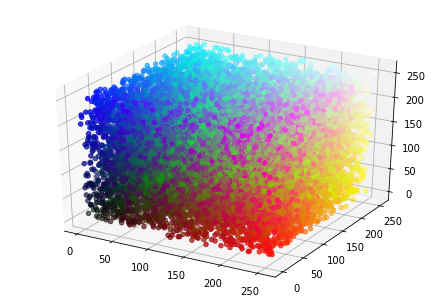

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(vectors[0].tolist(), vectors[1].tolist(), vectors[2].tolist(), c=vectors.to_numpy()/255)

We might want to try visualizing in a 2D space instead

In [18]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(vectors)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
data = pca.transform(vectors)
data

array([[ -43.19517223,  -77.69143014],
       [ -68.82389443,  -24.37626411],
       [ -10.48653926,  -70.07112747],
       ...,
       [ -38.16520581,  104.1850913 ],
       [ 102.05343439,   83.33216383],
       [  38.5140918 , -185.47927804]])

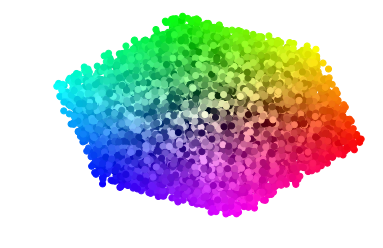

In [72]:
plt.scatter(data[:,0], data[:,1], c=vectors[[0,1,2]].to_numpy()/255);
plt.axis('off');

This is better! We can use the new coordinates that correspond to each color as a colormap, and map different languages to it to show prevalence. Let's just save them to file with our vectors dataframe.

In [44]:
vectors["x_dim"] = data[:, 0]
vectors["y_dim"] = data[:, 1]
vectors

,0,1,2,x_dim,y_dim
display,171,129,241,-43.195172,-77.691430
usage,3,45,125,-68.823894,-24.376264
if,216,150,233,-10.486539,-70.071127
arguments,33,178,245,-156.747665,-3.363055
are,174,59,98,68.709926,-47.088275
missing,177,5,206,13.095939,-152.377697
len,219,171,240,-17.825830,-59.210376
sys,52,55,80,-6.508920,-4.397189
argv,180,110,17,113.897727,37.430535
print,112,153,63,24.788608,62.331723


In [45]:
vectors.to_csv("colormap-vectors.csv")

Now we want to derive relative percentages / proportions of each extension compared to the global colorspace. For example, "import" might be really common in GoLang and Python, but not in C++.

In [48]:
# vectors = pandas.read_csv("colormap-vectors.csv")
counts = get_color_percentages(extensions, vectors)
# counts = pandas.read_csv("colormap-counts.csv")
counts

,Unnamed: 0,totals,.py-counts,.txt-counts,.sh-counts,-counts,.md-counts,.r-counts,.tab-counts,.out-counts,...,.tab-percent,.out-percent,.js-percent,.html-percent,.css-percent,.yml-percent,.svg-percent,.rst-percent,.in-percent,.err-percent
0,display,5713,156,998,4,124,382,3,5,0,...,0.000875,0.000000,0.229827,0.126553,0.345178,0.001225,0.001750,0.002801,0.000000,0.000000
1,usage,2355,410,1239,19,120,296,0,0,12,...,0.000000,0.005096,0.037367,0.052229,0.000000,0.000000,0.000000,0.019108,0.001274,0.000000
2,if,104072,23217,21656,379,1648,3977,330,2,12,...,0.000019,0.000115,0.464111,0.034236,0.000183,0.001384,0.000144,0.007754,0.000019,0.000000
3,arguments,6227,353,325,18,31,461,0,0,0,...,0.000000,0.000000,0.778545,0.017986,0.000000,0.000000,0.000000,0.012526,0.000161,0.000000
4,are,46223,2890,35889,121,1027,2945,178,50,24,...,0.001082,0.000519,0.029076,0.013089,0.000389,0.000238,0.000000,0.021050,0.000000,0.003202
5,missing,2506,565,1098,11,69,136,23,0,0,...,0.000000,0.000000,0.197526,0.012370,0.004789,0.003192,0.000798,0.022346,0.000000,0.000000
6,len,5317,3771,133,0,33,88,0,0,0,...,0.000000,0.000000,0.214971,0.017679,0.000000,0.000000,0.000000,0.004326,0.000000,0.006018
7,sys,3096,1663,1165,9,61,31,6,0,0,...,0.000000,0.000000,0.003230,0.044251,0.000000,0.000646,0.000000,0.003876,0.000000,0.000000
8,argv,2428,979,68,1,190,120,0,0,0,...,0.000000,0.000000,0.435750,0.001236,0.000000,0.000000,0.000000,0.003707,0.000000,0.000000
9,print,7239,5504,464,65,261,219,76,0,0,...,0.000000,0.000000,0.014505,0.059124,0.007598,0.000553,0.000000,0.008012,0.000000,0.000000


Now for each extension, let's generate an image that shows term prevalence!

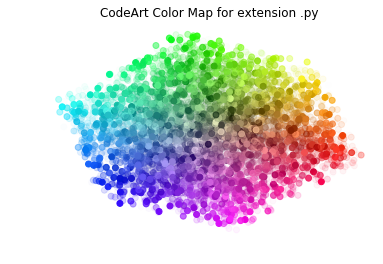

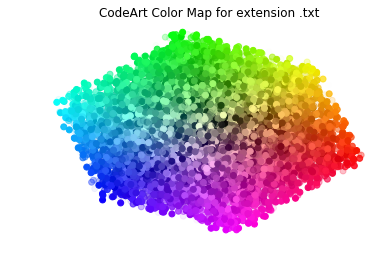

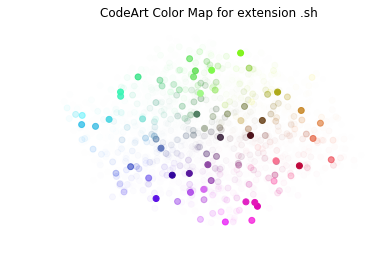

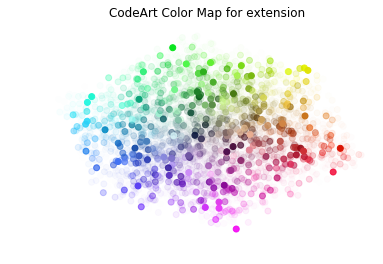

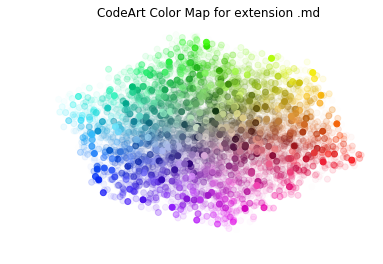

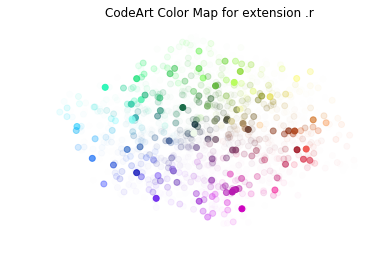

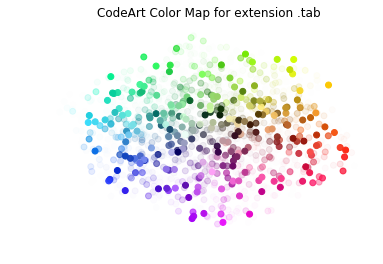

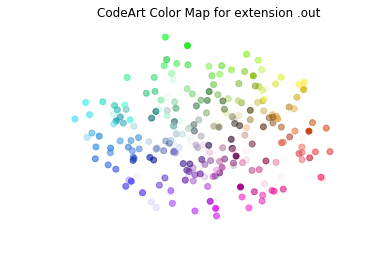

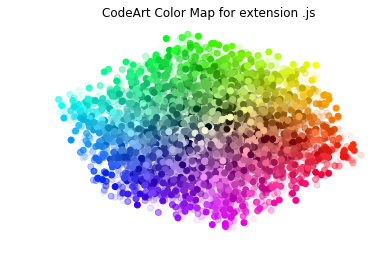

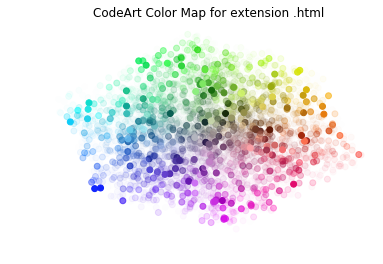

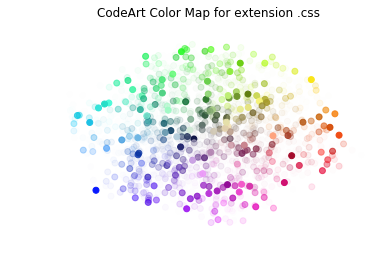

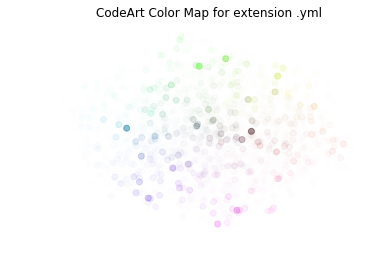

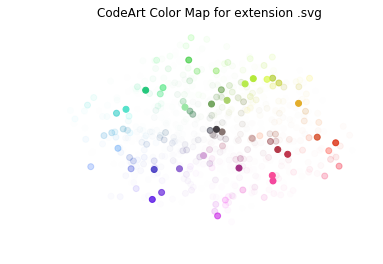

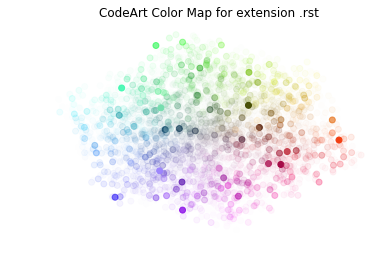

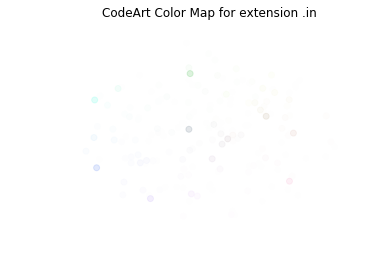

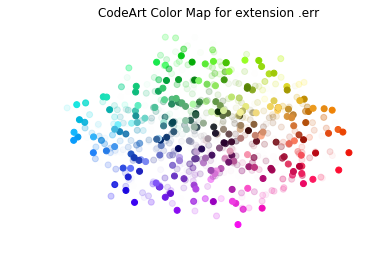

In [66]:
for ext in extensions:
    colors = vectors[[0, 1, 2]]/255

    # Alpha layer
    colors["alpha"] = counts.loc[:, "%s-percent" % ext].tolist()
    
    # Transparencies for the extensions
    plt.scatter(vectors["x_dim"], vectors["y_dim"], c=colors.to_numpy());
    plt.title("CodeArt Color Map for extension %s" % ext)
    plt.axis('off')
    plt.show()

Note that one thing we *didn't* do is to normalize opacity based on the number of files. Indeed, Python is darker because we have a lot more Python files. But actually, maybe we do want this to be represented in the data. I did happen to parse a Python folder here (so the result is logical) but you can imagine parsing many more languages and wanting to see in the visualizations how prevalent each extension is, along with words that are relevant to it.

## An Improved Colormap

But did you notice that our colormap doesn't optimally use the white space? Could we expand it into a rectangular region? It's worth a try! We would want to 'expand' the points to a region in the plane, so that the original nearest-neighbor relations are roughly preserved. This would then be a color mapping for our model - we can adjust levels (transparency) based on the relevance of a color to a particular extension.

One idea is to bulid a Voronoi diagram, and shift each point to the centroid or barycenter of its corresponding cell. This process can be repeated as many times as we like.

In [73]:
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

In [74]:
voronoi = Voronoi(data, qhull_options='Qbb Qc Qx')

In [75]:
def bound_value(x, x_max, x_min):
    x = min(x, x_max)
    x = max(x, x_min)
    return x

def bound_point(vals, max_vals, min_vals):
    assert len(vals) == len(max_vals) == len(min_vals)
    return [bound_value(val, max_val, min_val)
        for val, max_val, min_val in zip(vals, max_vals, min_vals)]

def points_ordered_as_regions(voronoi):
    region_point = [_ for _ in range(len(voronoi.point_region))]
    for v, i in enumerate(voronoi.point_region):
        region_point[i] = v
    return voronoi.points[region_point]

In [76]:
def compute_voronoi_centroids(voronoi, max_vals, min_vals):
  """Get the centroids of the given voronoid diagram.

  In the case of a region with a point at infinity, or if a region is not
  assigned to a point we just return the original point instead. For centroids
  outside the rectangle defined by max_vals and min_vals, we force these
  vertices inside the rectangle.

  Args:
    voronoi: scipy.spatial.Voronoi object.
    max_vals: The highest values in each dimension.
    min_vals: The lowest values in each dimension.

  returns: np.ndarray of the region centroids.
  """
  vertices = voronoi.vertices
  points = voronoi.points
  point_region = voronoi.point_region
  regions = voronoi.regions
  vertices = np.array([bound_point(v, max_vals, min_vals) for v in vertices])
  centroids = []
  for point_index, point in enumerate(points):

    region_index = point_region[point_index]
    if region_index == -1:  # If there is a point without a region, skip.
      centroids.append(bound_point(point, max_vals, min_vals))
      continue
    region = regions[region_index]

    # Get the points defining the region.
    has_infinity = False
    processed_region = []
    for index in region:
      if index != -1:  # Point at infinity.
        processed_region.append(index)
      else:
        has_infinity = True
        break
    if has_infinity:  # in this special case, we don't change the point.
      centroids.append(bound_point(point, max_vals, min_vals))
      continue
    region_vertices = vertices[processed_region]

    indices_range = range(-1, len(region_vertices)-1)
    x = [v[0] for v in region_vertices]
    y = [v[1] for v in region_vertices]
    A = 1/2 * sum([x[i]*y[i+1] - x[i+1]*y[i] for i in indices_range])
    if A == 0:  # If the area is zero, skip.
      centroids.append(bound_point(point, max_vals, min_vals))
      continue
    cx = 1/(6*A) * sum([(x[i] + x[i+1]) * (x[i]*y[i+1] - x[i+1]*y[i]) for i in indices_range])
    cy = 1/(6*A) * sum([(y[i] + y[i+1]) * (x[i]*y[i+1] - x[i+1]*y[i]) for i in indices_range])
    centroids.append(bound_point([cx, cy], max_vals, min_vals))
  return np.array(centroids)

In [89]:
def voronoi_spread(data, max_vals, min_vals, n_iter):
  for _ in range(n_iter):
    voronoi = Voronoi(data, qhull_options='Qbb Qx')
    data = compute_voronoi_centroids(voronoi, max_vals, min_vals)
  return data

In [90]:
max_vals, min_vals = [200, 200], [-200, -200]
centroids = compute_voronoi_centroids(voronoi, max_vals, min_vals)

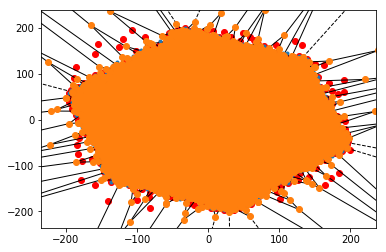

In [91]:
voronoi_plot_2d(voronoi)  # Voronoi region plot
plt.scatter(*np.array(centroids).T, c='r')  # Show our centroids.

In [92]:
spread_data = voronoi_spread(data, max_vals, min_vals, n_iter = 10)

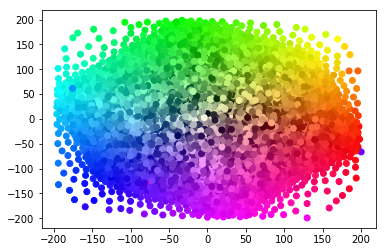

In [96]:
plt.scatter(spread_data[:,0], spread_data[:, 1], c=vectors[[0,1,2]].to_numpy()/255);

okay we're on to something! We would now want to do some region growing, so at least the colors expand to the corners. 

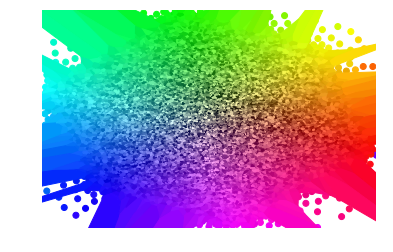

In [105]:
# See https://stackoverflow.com/questions/41244322/how-to-color-voronoi-according-to-a-color-scale-and-the-area-of-each-cell
plt.scatter(spread_data[:,0], spread_data[:, 1], c=vectors[[0,1,2]].to_numpy()/255);
for r in range(len(voronoi.point_region)):
    region = voronoi.regions[voronoi.point_region[r]]
    if not -1 in region:
        polygon = [voronoi.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=(vectors[[0,1,2]].to_numpy()/255)[r])
        
plt.xlim((-200, 200))   # set the xlim to left, right
plt.ylim((-200, 200))     # set the xlim to left, right
plt.axis("off")
plt.show()

Hmm, not perfect yet, but getting there, will work on later.